In [1]:
%matplotlib inline

import math
import random #uses the MersenneTwister by default
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

sns.set(style="darkgrid")

# Homework 4
## Problem 1

A d-dimensional hypersphere is defined by the condition:
$$x_{o}^2 + x_{1}^2 + \ldots + x_{d-1}^2 \leq R^2$$
Its volume can be calculated analytically using the formula:
$$V_d (R) = \frac{\pi^{d/2} R^d}{\Gamma(\frac{d}{2} + 1)}$$

Write a program to determine the volume of unit hyperspheres (R = 1) using a MonteCarlo integration method, for d = 2,3,4,5,6. You can use either the Hit-or-Miss or the Sample Mean method.

Produce the following using a "good" PRNG, like D1(A1r) or the Mersenne Twister (which one did you use?):

In [2]:
def analyticalVolume(d, R):
    return (((math.pi**(d / 2.0)) * (R**d)) / (special.gamma((d / 2.0) + 1)))

aVolume2 = analyticalVolume(2, 1)
aVolume3 = analyticalVolume(3, 1)
aVolume4 = analyticalVolume(4, 1)
aVolume5 = analyticalVolume(5, 1)
aVolume6 = analyticalVolume(6, 1)

In [3]:
def mc_Integrate(d = 3, n = 100000, prng = np.random.uniform):
    '''
     Aproximate integral of a unit hypersphere of dimension d using hit-or-miss Monte Carlo method. 
     @param d: dimension of the hypersphere
     @param n: number of points to sample
     @param prng: pseudo-random number generator to use
     @return aproximate value of the integral, and the error
    '''
    a = [-1]*d
    b = [1]*d
    inside = 0
    for i in range(n):
        x = prng(a, b, d)
        if 1 > np.linalg.norm(x):
            inside += 1
    v = np.prod(np.array(b) - np.array(a))
    return (float(inside) / n) * v, v

### a)
Plots of the accuracy of your numerical results (with error bars) vs.  the number of points (N) generated.

In [4]:
xRange = np.logspace(3, 6, dtype = int)
lRange = xRange.tolist()

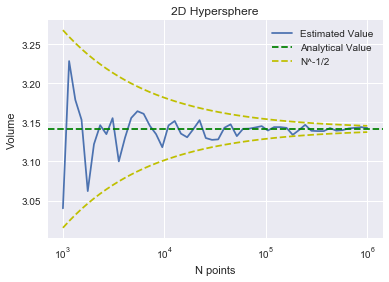

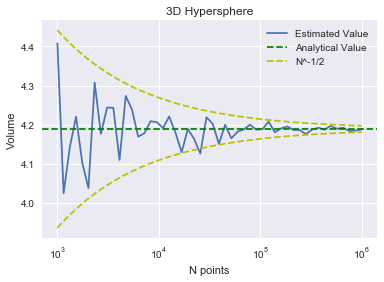

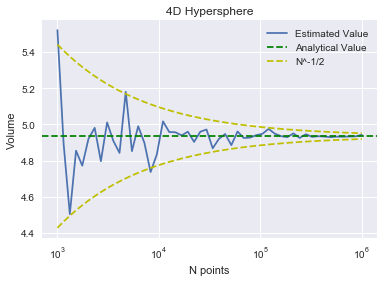

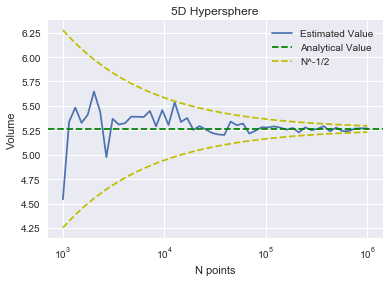

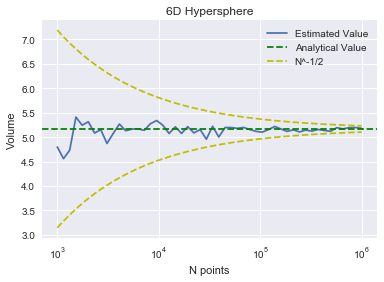

In [5]:
for d in (2, 3, 4, 5, 6):
    estimates = []
    for n in lRange:
        est, v = mc_Integrate(d, n)
        estimates.append(est)
    av = analyticalVolume(d, 1)    
    plt.semilogx(xRange, estimates, label='Estimated Value')
    plt.title("{}D Hypersphere".format(d))
    plt.axhline(y=av, color='g', linestyle='--', label='Analytical Value')
    plt.semilogx(xRange, av + (v / np.sqrt(xRange)), color='y', linestyle='--')
    plt.semilogx(xRange, av - (v / np.sqrt(xRange)), color='y', linestyle='--', label='N^-1/2')
    plt.xlabel("N points")
    plt.ylabel("Volume")
    plt.legend()
    plt.show()

### b)
What is the (approximate) accuracy vs N behavior of your results. Does this follow the expected N^(−1/2) behavior?

The approximate accuracy vs N behavior of my results is aproximately v/(n^1/2), and should always be between the envelope shown, although the 5D and 6D hyperspheres demonstrated an accuracy better than this on average.

### c)
Compare the results you obtain with your good PRNG with a PRNG that has obvious problems, like LCG(5,3,32).  Describe how the "bad" PRNG’s results differ from your "good" results.

In [6]:
def lcg(a, c, m, x):
    while True:
        x = (a * x + c) % m
        yield x

D1_A1r = lcg(2685821657736338717, 0, 18446744073709551616, 1) #2^64 = 18446744073709551616

RANDU = lcg(65539, 0, 2**31, 1)

bad_LCG = lcg(5, 3, 32, 1)

def bad_rand(Min, Max, d):
    r = []
    for i in range(d):
        rv = next(bad_LCG)
        rv = Min[i] + (rv * (Max[i] - Min[i])) / 31 #scale and shift to be between min and max
        r.append(rv)
    return r

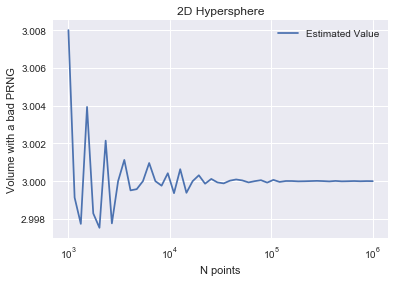

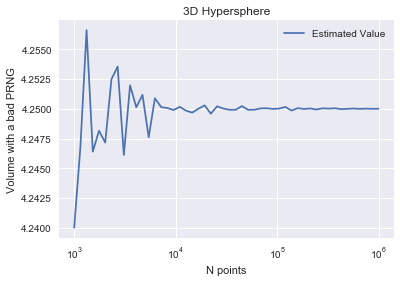

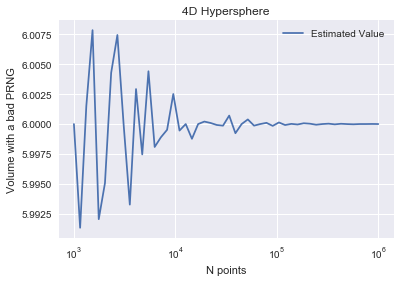

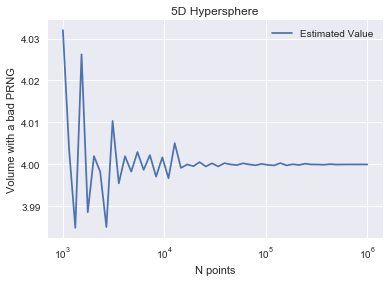

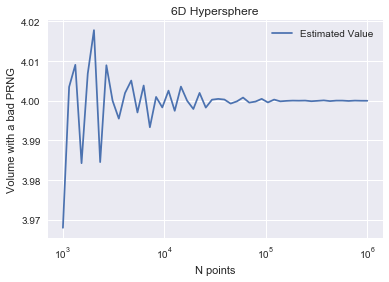

In [7]:
for d in (2, 3, 4, 5, 6):
    estimates = []
    for n in lRange:
        est, v = mc_Integrate(d, n, prng = bad_rand)
        estimates.append(est)
    av = analyticalVolume(d, 1)    
    plt.semilogx(xRange, estimates, label='Estimated Value')
    plt.title("{}D Hypersphere".format(d))
    plt.xlabel("N points")
    plt.ylabel("Volume with a bad PRNG")
    plt.legend()
    plt.show()

When using a bad PRNG, the results were significantly worse espescially for the lower dimensions, as the PRNG's period was too short to get a good estimate value. I chose not to include the analytical value as it skewed the scale. For comparison the 5th dimension Hypersphere's with the bad prng and analytical value, and RANDU are below. Dispite many problems, RANDU displays much better properties than the other bad prng and just using it like this would be hard to detect its flaws. 

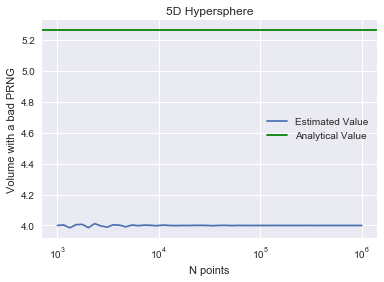

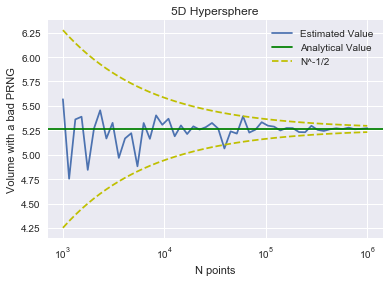

In [8]:
for d in (5,):
    estimates = []
    for n in lRange:
        est, v = mc_Integrate(d, n, prng = bad_rand)
        estimates.append(est)
    av = analyticalVolume(d, 1)    
    plt.semilogx(xRange, estimates, label='Estimated Value')
    plt.title("{}D Hypersphere".format(d))
    plt.axhline(y=av, color='g', linestyle='-', label='Analytical Value')
    plt.xlabel("N points")
    plt.ylabel("Volume with a bad PRNG")
    plt.legend()
    plt.show()

def bad_RANDU(Min, Max, d):
    r = []
    for i in range(d):
        rv = next(RANDU)
        rv = Min[i] + (rv * (Max[i] - Min[i])) / (2**31 - 1)
        r.append(rv)
    return r

for d in (5,):
    estimates = []
    for n in lRange:
        est, v = mc_Integrate(d, n, prng = bad_RANDU)
        estimates.append(est)
    av = analyticalVolume(d, 1)    
    plt.semilogx(xRange, estimates, label='Estimated Value')
    plt.title("{}D Hypersphere".format(d))
    plt.axhline(y=av, color='g', linestyle='-', label='Analytical Value')
    plt.xlabel("N points")
    plt.ylabel("Volume with a bad PRNG")
    plt.semilogx(xRange, av + (v / np.sqrt(xRange)), color='y', linestyle='--')
    plt.semilogx(xRange, av - (v / np.sqrt(xRange)), color='y', linestyle='--', label='N^-1/2')
    plt.legend()
    plt.show()

## Problem 2
Evaluate the integral:
$$\int_{0}^{1} f(x)dx = \int_{0}^{1} \sqrt{1-x^2} dx = \frac{\pi}{4}$$
using importance sampling with
$$p(x) = A(1-x)$$ $$[x \geq 0]$$
and a ”good” PRNG, like D1(A1r) or the Mersenne Twister.

### a)
What is the appropriate value of A?

In [9]:
# 2

### b) 
What transformation can be used to allow us to generate random numbers x according to the PDF, p(x), in x ∈ [0,1] from uniformly distributed random numbers, r in [0,1]?

### c)
Make a plot of the deviation of your numerical result (including statistical uncertainties) from the analytic result vs. the number of points you generate, N , for N in the range 10^2 − 10^9.

### d)
What is the variance of f(x)/p(x) in the interval [0,1]? Compare this withthe variance of f(x) over the same interval.